Importing the library

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import joblib

Importing Our Dataset

In [2]:
data = pd.read_csv('creditcard.csv')

Description Of Dataset

In [3]:
pd.options.display.max_columns=None

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
80285,58414,-1.203882,0.112137,0.797503,0.114267,0.752784,-0.749442,-0.367096,-0.928695,-0.367096,0.361314,1.125186,0.900061,0.735990,0.242272,0.617793,-0.028954,-0.353627,0.457547,1.471891,-0.330439,0.924696,0.425569,-0.138097,0.109988,-0.873481,0.843151,-0.029677,0.347903,10.69,0
80286,58414,-0.490709,0.489936,1.146703,-0.737966,0.656373,-0.584777,0.594174,-0.045972,-0.014220,-0.823421,-1.481309,-0.027028,0.214446,-0.152274,-0.336307,0.259696,-0.646018,-0.326117,0.028990,-0.041460,-0.156879,-0.449168,-0.092590,-0.418320,-0.353314,0.276256,0.074029,0.142259,4.00,0
80287,58414,-6.026991,-5.368440,1.389625,-0.283740,1.565185,-0.634846,-1.486810,-0.288226,0.837811,1.582797,1.521852,0.237060,-0.327541,-1.371539,-0.674208,0.923859,0.505909,-2.230769,0.322509,-2.664801,-1.091147,0.303141,-2.227436,0.049247,0.088716,-0.194653,1.567386,0.207560,566.20,0
80288,58415,-1.874845,0.581288,-1.040248,-0.858321,2.315871,3.082591,-0.255696,1.622410,-0.960465,-0.974384,-0.696209,0.057670,-0.017366,1.022621,0.452868,0.803024,-0.838343,0.472757,-0.528612,-0.198285,0.177947,-0.089091,-0.357909,1.013734,0.398759,-0.489032,-0.194233,-0.185583,73.27,0
80289,58415,0.097752,-0.530863,1.226556,-1.722385,-1.033304,-1.163942,0.159670,-0.420878,-1.981723,1.256810,-0.812932,-1.833655,-1.298497,-0.323138,-0.539398,-1.212569,0.954201,-0.074441,0.073095,-0.298917,-0.094135,0.298477,-0.001964,0.672116,-0.534897,-0.259132,0.007754,-0.046593,35.00,0


In [6]:
data.shape

(80290, 31)

In [7]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 80290
Number of Columns 31


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80290 entries, 0 to 80289
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    80290 non-null  int64  
 1   V1      80290 non-null  float64
 2   V2      80290 non-null  float64
 3   V3      80290 non-null  float64
 4   V4      80290 non-null  float64
 5   V5      80290 non-null  float64
 6   V6      80290 non-null  float64
 7   V7      80290 non-null  float64
 8   V8      80290 non-null  float64
 9   V9      80290 non-null  float64
 10  V10     80290 non-null  float64
 11  V11     80290 non-null  float64
 12  V12     80290 non-null  float64
 13  V13     80290 non-null  float64
 14  V14     80290 non-null  float64
 15  V15     80290 non-null  float64
 16  V16     80290 non-null  float64
 17  V17     80290 non-null  float64
 18  V18     80290 non-null  float64
 19  V19     80290 non-null  float64
 20  V20     80290 non-null  float64
 21  V21     80290 non-null  float64
 22

Check For Null Values In Dataset

In [9]:
data.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80285,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
80286,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
80287,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
80288,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Feautre Scaling On Dataset

In [11]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [13]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.191798,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.353434,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.041725,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.094871,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.103696,0


Removing Extra Columns and Duplicates from Dataset

In [14]:
data = data.drop(['Time'],axis=1)

In [15]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.191798,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.353434,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.041725,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.094871,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.103696,0


In [16]:
data.shape

(80290, 30)

In [17]:
data.duplicated().any()

True

In [18]:
data = data.drop_duplicates()

In [19]:
data.shape

(78529, 30)

Not Handling Imbalanced

In [20]:
data['Class'].value_counts()

Class
0    78333
1      196
Name: count, dtype: int64

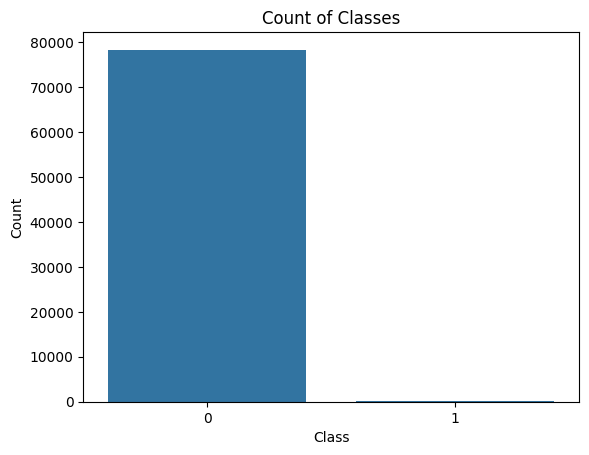

In [21]:
class_counts = data['Class'].value_counts().reset_index()
class_counts.columns = ['Class', 'count']
sns.barplot(x='Class', y='count', data=class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Classes')
plt.show()

Store Feature Matrix In X And Response (Target) In Vector y

In [22]:
X = data.drop('Class',axis=1)
y = data['Class']

Splitting The Dataset Into The Training Set And Test Set

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

Handling Imbalanced Dataset

In [24]:
#UNDERSAMPLING

In [25]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [26]:
normal.shape

(78333, 30)

In [27]:
fraud.shape

(196, 30)

In [28]:
normal_sample=normal.sample(n=473)

In [29]:
normal_sample.shape

(473, 30)

In [30]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [31]:
new_data['Class'].value_counts()

Class
0    473
1    196
Name: count, dtype: int64

In [32]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.046683,-0.940524,1.203974,0.784273,0.286705,0.339839,0.037061,0.240038,-1.674174,0.625717,0.507973,0.409063,0.072009,0.149042,-0.574675,-2.407577,0.523471,1.373976,0.371799,0.167082,-0.152111,-0.285694,0.419357,-0.348844,-0.200697,-0.250020,0.128416,0.167992,0.253138,0
1,-0.293486,0.244508,2.096148,1.286172,-0.233602,-0.104056,0.327495,-0.080216,0.483063,-0.251030,-1.039951,-0.094548,-0.577632,-0.549321,-0.313086,-0.788233,0.217184,-0.000342,0.787421,0.151589,0.010582,0.358505,-0.134941,0.406879,0.147669,-0.244310,-0.094231,-0.192932,-0.203665,0
2,-0.676991,1.201683,1.594477,-0.003437,-0.269185,-1.113540,0.688085,-0.074098,-0.214681,-0.000155,-0.095228,0.033093,-0.092371,0.104815,0.848340,0.086529,-0.279545,-0.467752,-0.137875,0.202999,-0.239724,-0.563061,0.024061,0.687744,-0.189759,0.056154,0.377242,0.181533,-0.345048,0
3,1.240747,0.848160,-0.199825,1.553724,0.171273,-1.194116,0.228779,-0.333950,1.172987,-1.056222,1.095964,-2.548641,1.718977,0.070838,0.336703,0.560485,1.618926,0.848768,-0.829751,-0.132409,-0.216618,-0.296833,-0.113442,0.194913,0.672662,-0.366472,0.009423,0.051389,-0.359705,0
4,1.446038,-0.609992,-0.889162,-1.635125,1.481085,3.266423,-1.201075,0.716359,0.362833,0.292790,1.009189,-3.174291,1.865051,1.407294,0.256947,1.530555,0.445381,-0.870572,0.773972,0.174948,-0.292127,-0.886050,0.101633,0.918834,0.365523,-0.505914,-0.015559,0.011413,-0.293541,0


In [33]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

Logistic Regression

In [35]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [36]:
y_pred1 = log.predict(X_test)

In [37]:
accuracy_score(y_test,y_pred1)

0.9552238805970149

In [38]:
precision_score(y_test,y_pred1)

0.926829268292683

In [39]:
recall_score(y_test,y_pred1)

0.926829268292683

In [40]:
f1_score(y_test,y_pred1)

0.926829268292683

Decision Tree Classifier

In [41]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
y_pred2 = dt.predict(X_test)

In [43]:
accuracy_score(y_test,y_pred2)

0.917910447761194

In [44]:
precision_score(y_test,y_pred2)

0.8571428571428571

In [45]:
recall_score(y_test,y_pred2)

0.8780487804878049

In [46]:
f1_score(y_test,y_pred2)

0.8674698795180722

Comparing Logistic Regression and Decision Tree Classifier For undersampling

In [47]:
final_data = pd.DataFrame({'Models':['LR','DT'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,accuracy_score(y_test,y_pred2)*100,]})

In [48]:
final_data

,Models,ACC
0,LR,95.522388
1,DT,91.791045


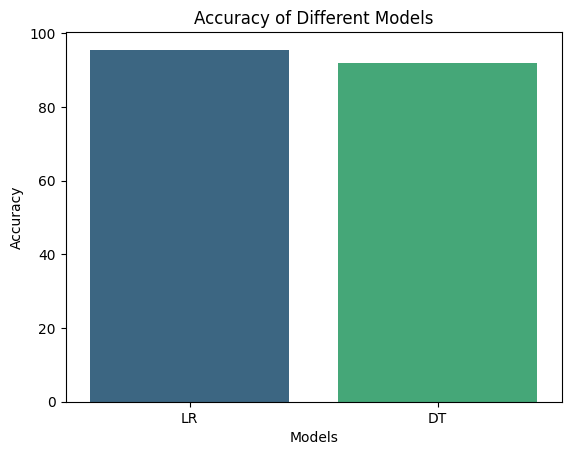

In [49]:
sns.barplot(x='Models', y='ACC', data=final_data, palette='viridis', hue='Models', legend=False)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()

In [50]:
#Oversampling 
X = data.drop('Class',axis=1)
y = data['Class']

In [51]:
X.shape

(78529, 29)

In [52]:
y.shape

(78529,)

In [53]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [54]:
y_res.value_counts()

Class
0    78333
1    78333
Name: count, dtype: int64

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

Logistic Regression

In [56]:
log = LogisticRegression(max_iter=1000)
log.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [57]:
y_pred1 = log.predict(X_test)

In [58]:
accuracy_score(y_test,y_pred1)

0.9668411310397651

In [59]:
precision_score(y_test,y_pred1)

0.9781628446276733

In [60]:
recall_score(y_test,y_pred1)

0.9559332703808624

In [61]:
f1_score(y_test,y_pred1)

0.9669203094654397

Decision Tree Classifier

In [62]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [63]:
y_pred2 = dt.predict(X_test)

In [64]:
accuracy_score(y_test,y_pred2)

0.9983723750558499

In [65]:
precision_score(y_test,y_pred2)

0.9977992957746479

In [66]:
recall_score(y_test,y_pred2)

0.9989927604658483

In [67]:
f1_score(y_test,y_pred2)

0.9983956714586807

Random Forest Classifier

In [68]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [69]:
y_pred3 = rf.predict(X_test)

In [70]:
accuracy_score(y_test,y_pred3)

0.9999361715708176

In [71]:
precision_score(y_test,y_pred3)

0.9998741109082898

In [72]:
recall_score(y_test,y_pred3)

1.0

In [73]:
f1_score(y_test,y_pred3)

0.9999370514918796

Comparing Logistic Regression and Decision Tree Classifier For undersampling

In [74]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,accuracy_score(y_test,y_pred2)*100, accuracy_score(y_test,y_pred3)*100]})

In [75]:
final_data

,Models,ACC
0,LR,96.684113
1,DT,99.837238
2,RF,99.993617


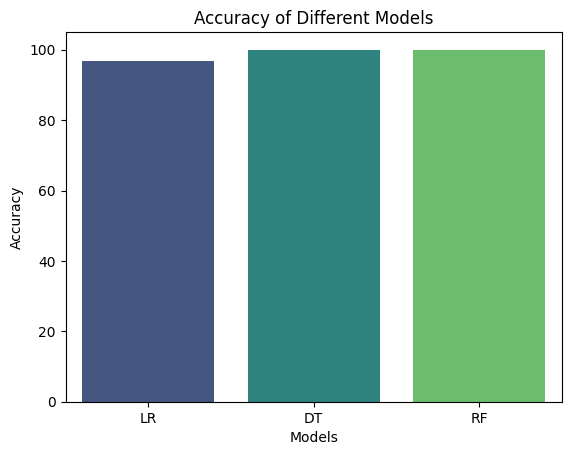

In [76]:
sns.barplot(x='Models', y='ACC', data=final_data, palette='viridis', hue='Models', legend=False)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()

Save The Model ( The best model )

In [77]:
rf1 = RandomForestClassifier()
rf1.fit(X_res,y_res)

RandomForestClassifier()

In [78]:
joblib.dump(rf1,"credit_card_model")

['credit_card_model']

In [79]:
model = joblib.load("credit_card_model")

In [80]:
import warnings
warnings.filterwarnings('ignore')

In [81]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])
warnings.resetwarnings()

In [82]:
pred

array([0], dtype=int64)

In [83]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation
